In [2]:
%matplotlib inline

import pandas as pd
from sklearn.metrics import auc
import matplotlib.pyplot as plt # standard Python plotting library
import numpy as np  # fundamental package for scientific computing, handles arrays and math
import scipy.signal
from scipy.signal import find_peaks, peak_prominences
import scipy.stats as stats
from scipy.stats import zscore
from pathlib import Path
import tdt # import the tdt library
import seaborn as sns
from matplotlib import rcParams
import os
import numpy as np

In [3]:
blockpath = 'E:\Tanks\CRF-231121-145325\EN63CRFD4-240201-090917' 
data = tdt.read_block(blockpath) # created a dictionary to read
isosbestic = '_415B'
dopa='_465B'

REF_EPOC     = 'RMG_'
isosbestic
dopa
STREAM_STORE = '_465B'   #seems to be having trouble finding this later on?
ARTIFACT     = np.inf       # optionally set an artifact rejection level (figure out what this actually does)
CHANNEL      = 1
TRANGE       = [-5, 10]  # window size [start time relative to epoc onset, window duration]
BASELINE_PER = [-5, 2]

read from t=0s to t=2380.75s


In [4]:
num_samples_iso = len(data['streams'][isosbestic].data)
stream_time_iso = np.linspace(1, num_samples_iso, num_samples_iso) / data['streams'][isosbestic]['fs']  # what is the unit that is being output here?
ti = int(2 * data['streams'][isosbestic]['fs'])
td = int(2 * data['streams'][dopa]['fs'])
num_samples_dopa = len(data['streams'][dopa].data)
stream_time_dopa = np.linspace(1, num_samples_dopa, num_samples_dopa) / data['streams'][dopa]['fs']


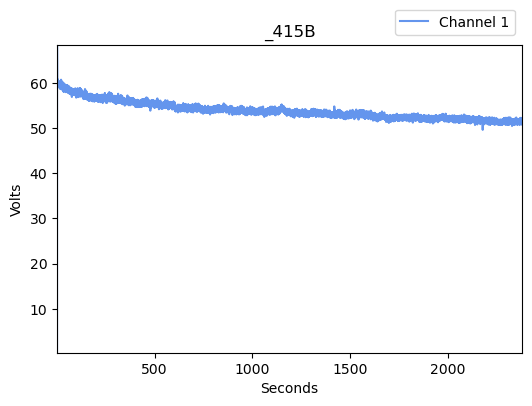

In [5]:
t_iso = int((num_samples_iso/data['streams'][isosbestic]['fs']) * data['streams'][isosbestic]['fs']) # int rounds it to the nearest integer

fig1 = plt.subplots(figsize=(6, 4))
channel = 1 

# plot the line using slices
plt.plot(stream_time_iso[0:t_iso], data['streams'][isosbestic].data[channel-1:t_iso], color='cornflowerblue') # when you add channel, need to add an index: [channel-1,0:t]
plt.title(f'{isosbestic}', fontsize=12)
plt.xlabel('Seconds', fontsize=10)
plt.ylabel('Volts', fontsize=10)   #should be mVs not Volts #####
plt.legend(('Channel {}'.format(channel),),
           loc='lower right', 
           bbox_to_anchor=(1.0,1.01)
          )
plt.autoscale(tight=True)
plt.show()


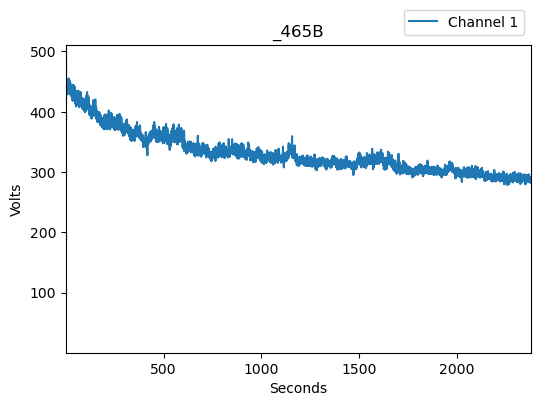

In [6]:
t_dopa = int((num_samples_dopa/data['streams'][dopa]['fs']) * data['streams'][dopa]['fs'])
##### t_dopa = int((num_samples/data['streams'][dopa]['fs']) * data['streams'][dopa]['fs'])

# declare the figure size
fig2 = plt.subplots(figsize=(6, 4))

channel = 1 

plt.plot(stream_time_dopa[0:t_dopa], data['streams'][dopa].data[channel-1:t_dopa])

plt.title(f'{dopa}', fontsize=12)
plt.xlabel('Seconds', fontsize=10)
plt.ylabel('Volts', fontsize=10)   #should be mVs not Volts #####
plt.legend(('Channel {}'.format(channel),),
           loc='lower right', 
           bbox_to_anchor=(1.0,1.01)
          )
plt.autoscale(tight=True)
plt.show()


In [42]:
len(zall)

29

In [38]:
zmean = np.mean(zall, axis = 0)

In [39]:
from scipy.signal import find_peaks
peaks = find_peaks(zmean, prominence=1)
peaks_y = [zmean for i in peaks[0]]

ValueError: x and y must be the same size

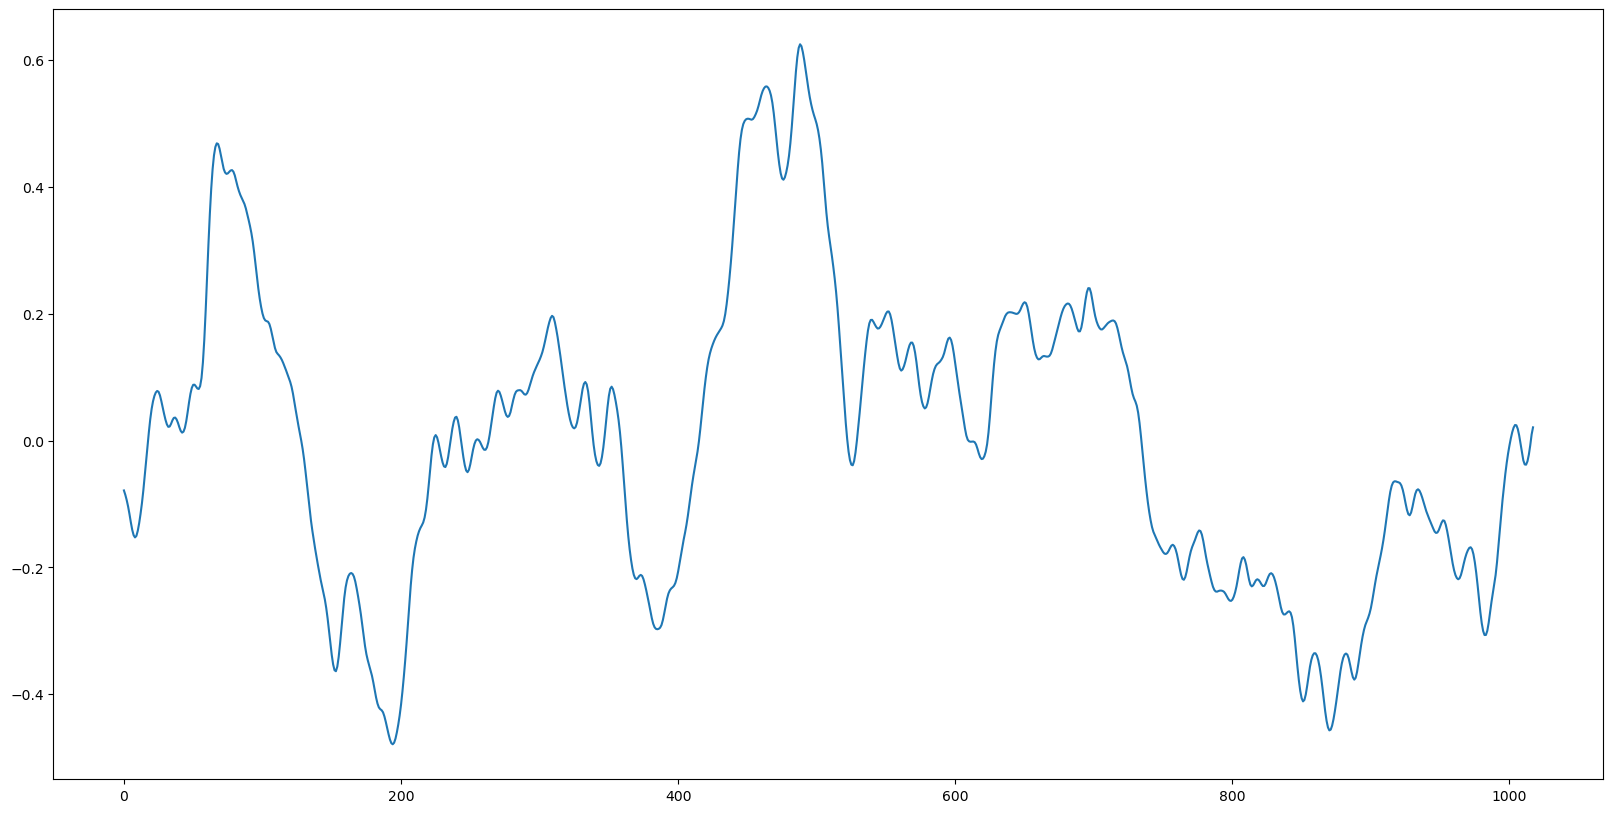

In [40]:
plt.figure(figsize=[20, 10])
plt.plot((np.mean(zall, axis=0)))
plt.scatter(peaks[0], peaks_y,s = 60, color="red", marker = "o")
plt.title("EN 74, CRF Day 5", fontsize=24)
plt.ylabel("▲F/F", fontsize=24)
plt.xlabel("TimeStamp", fontsize=24)

print(peaks)
print(len(peaks[0]))

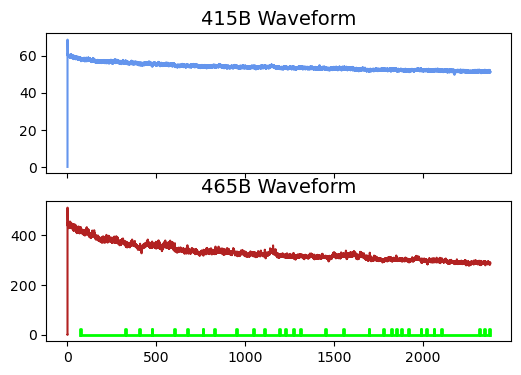

In [8]:
time_iso = np.linspace(1, len(data['streams'][isosbestic]['data']), len(data['streams'][isosbestic]['data'])) / data['streams'][isosbestic]['fs']
time_dopa = np.linspace(1, len(data['streams'][dopa]['data']), len(data['streams'][dopa]['data'])) / data['streams'][dopa]['fs']
# StimSync epoc event
STIM_SYNC = 'RNP_'
rnp_on = data.epocs[STIM_SYNC].onset
rnp_off = data.epocs[STIM_SYNC].offset 
rnp_x = np.reshape(np.kron([rnp_on, rnp_on+5], np.array([[1], [1]])).T, [1, -1])[0]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 4), sharex=True)

ax1.plot(time_iso, data['streams'][isosbestic]['data'], color='cornflowerblue')
ax1.set_title('415B Waveform', fontsize=14)

ax2.plot(time_dopa, data['streams'][dopa]['data'], color='firebrick')
ax2.set_title('465B Waveform', fontsize=14)

sz = len(rnp_on)
d = data.epocs[STIM_SYNC].data
rnp_y = np.reshape(np.vstack([np.zeros(sz), d, d, np.zeros(sz)]).T, [1,-1])[0]


ax2.plot(rnp_x, 25*(rnp_y), color='lime', linewidth=2)

# ax3.plot(time_pNe1, data.streams.pNe1.data, color='slategray')
# ax3.set_title('Plot Decimated Spikes', fontsize=14)

# ax3.set_xlabel('Time (s)', fontsize=12)
# ax3.set_ylabel('Amplitude ($\mu$V)', fontsize=12)

plt.show()

In [9]:
#setting up variable names for the data I want to get out of the tank for this
REF_EPOC     = 'RMG_'
URM = 'URM_'
STREAM_STORE = '_465B'   #seems to be having trouble finding this later on?
ARTIFACT     = np.inf       # optionally set an artifact rejection level (figure out what this actually does)
CHANNEL      = 1
TRANGE       = [-5, 10]  # window size [start time relative to epoc onset, window duration]
BASELINE_PER = [-5, 5]

In [10]:
data = tdt.epoc_filter(data, 'RMG_', t=TRANGE)  #filters the chosen epocs (RNP_) and time set around those epocs
# Optionally remove artifacts. If any waveform is above ARTIFACT level, or
# below -ARTIFACT level, remove it from the data set.
total1 = np.size(data['streams'][dopa].filtered)
total2 = np.size(data['streams'][isosbestic].filtered)

# List comprehension checking if any single array in 2D filtered array is > Artifact or < -Artifact
data['streams'][dopa].filtered = [x for x in data['streams'][dopa].filtered 
                                if not np.any(x > ARTIFACT) or np.any(x < -ARTIFACT)]
data['streams'][isosbestic].filtered = [x for x in data['streams'][isosbestic].filtered 
                               if not np.any(x > ARTIFACT) or np.any(x < -ARTIFACT)]

# Get the total number of rejected arrays
bad1 = total1 - np.size(data['streams'][dopa].filtered)
bad2 = total2 - np.size(data['streams'][isosbestic].filtered)
total_artifacts = bad1 + bad2


c:\Users\Tischfield\AppData\Local\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3202: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


In [11]:
# More examples of list comprehensions
min1 = np.min([np.size(x) for x in data['streams'][dopa].filtered])
min2 = np.min([np.size(x) for x in data['streams'][isosbestic].filtered])
data['streams'][dopa].filtered = [x[1:min1] for x in data['streams'][dopa].filtered]
data['streams'][isosbestic].filtered = [x[1:min2] for x in data['streams'][isosbestic].filtered]

# Downsample and average 10x via a moving window mean
N = 10 # Average every 10 samples into 1 value
F415 = []
F465 = []
for lst in data['streams'][isosbestic].filtered: 
    small_lst = []
    for i in range(0, min2, N):
        small_lst.append(np.mean(lst[i:i+N-1])) # This is the moving window mean
    F415.append(small_lst)

for lst in data['streams'][dopa].filtered: 
    small_lst = []
    for i in range(0, min1, N):
        small_lst.append(np.mean(lst[i:i+N-1]))
    F465.append(small_lst)

#Create a mean signal, standard error of signal, and DC offset
meanF415 = np.mean(F415, axis=0)
stdF415 = np.std(F415, axis=0)/np.sqrt(len(data['streams'][isosbestic].filtered))
dcF415 = np.mean(meanF415)
meanF465 = np.mean(F465, axis=0)
stdF465 = np.std(F465, axis=0)/np.sqrt(len(data['streams'][dopa].filtered))
dcF465 = np.mean(meanF465)


In [12]:
ts1 = TRANGE[0] + np.linspace(1, len(meanF465), len(meanF465))/data['streams'][dopa].fs*N
ts2 = TRANGE[0] + np.linspace(1, len(meanF415), len(meanF415))/data['streams'][isosbestic].fs*N

# Subtract DC offset to get signals on top of one another
meanF415 = meanF415 - dcF415
meanF465 = meanF465 - dcF465
fig = plt.figure(figsize=(9, 14))

Y_fit_all = []
Y_dF_all = []
for x, y in zip(F415, F465):
    x = np.array(x)
    y = np.array(y)
    bls = np.polyfit(x, y, 1)
    fit_line = np.multiply(bls[0], x) + bls[1]
    Y_fit_all.append(fit_line)
    Y_dF_all.append(y-fit_line)

# Getting the z-score and standard error
zall = []
for dF in Y_dF_all: 
   ind = np.where((np.array(ts2)<BASELINE_PER[1]) & (np.array(ts2)>BASELINE_PER[0]))
   zb = np.mean(dF[ind])
   zsd = np.std(dF[ind])
   zall.append((dF - zb)/zsd)

zerror = np.std(zall, axis=0)/np.sqrt(np.size(zall, axis=0))


<Figure size 900x1400 with 0 Axes>

In [29]:
zall

[array([ 0.7836213 ,  0.81972605,  0.8718112 , ..., -1.5236113 ,
        -1.5230695 , -1.529396  ], dtype=float32),
 array([0.3128374 , 0.31493464, 0.32124344, ..., 0.6903329 , 0.6798069 ,
        0.6753006 ], dtype=float32),
 array([0.64717096, 0.6202828 , 0.5987048 , ..., 1.0163975 , 1.0613673 ,
        1.0860298 ], dtype=float32),
 array([0.8055939 , 0.71853286, 0.6269916 , ..., 0.3551223 , 0.3625912 ,
        0.3695058 ], dtype=float32),
 array([ 0.41716695,  0.38752896,  0.3651432 , ..., -1.4622009 ,
        -1.4076096 , -1.3721656 ], dtype=float32),
 array([ 0.6880787 ,  0.6390908 ,  0.6060366 , ..., -0.24445686,
        -0.20591713, -0.18319051], dtype=float32),
 array([-2.22867   , -2.22577   , -2.231851  , ..., -0.1437777 ,
        -0.07081975, -0.0288224 ], dtype=float32),
 array([0.16221465, 0.09929354, 0.04318069, ..., 0.18002668, 0.23616281,
        0.26672432], dtype=float32),
 array([-0.03056996, -0.04497935, -0.06622918, ...,  0.44534647,
         0.4574016 ,  0.4623785

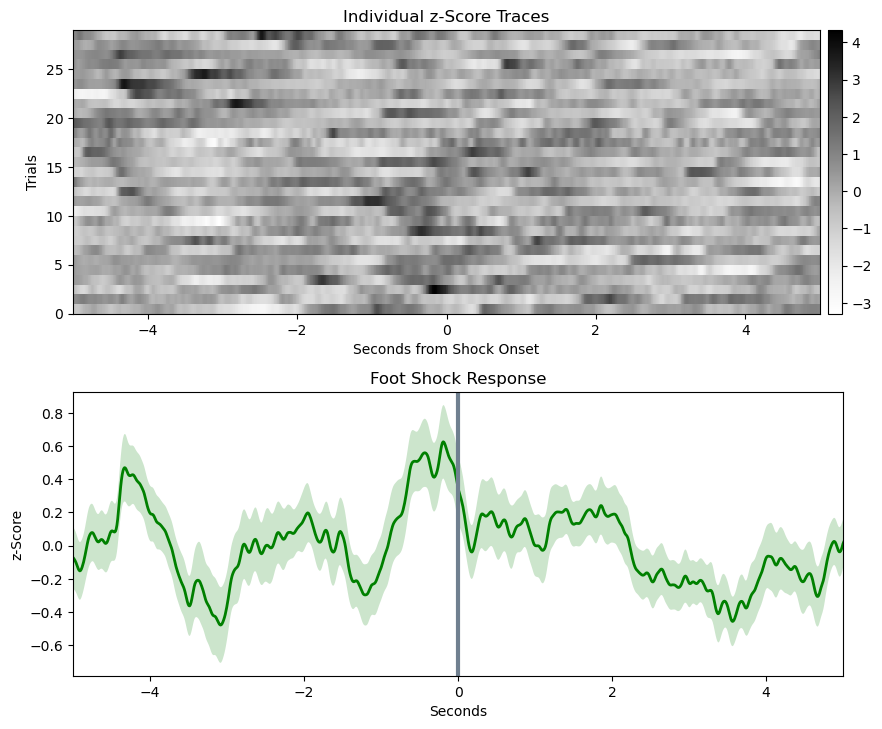

In [14]:
ax1 = fig.add_subplot(412)
cs = ax1.imshow(zall, cmap=plt.cm.Greys, interpolation='none', aspect="auto",
                extent=[TRANGE[0], TRANGE[1]+TRANGE[0], 0, len(data['streams'][dopa].filtered)])
cbar = fig.colorbar(cs, pad=0.01, fraction=0.02)

ax1.set_title('Individual z-Score Traces')
ax1.set_ylabel('Trials')
ax1.set_xlabel('Seconds from Shock Onset')

plt.close() # Suppress figure output again

ax2 = fig.add_subplot(413)
p6 = ax2.plot(ts2, np.mean(zall, axis=0), linewidth=2, color='green', label='Dopamine')
p7 = ax2.fill_between(ts1, np.mean(zall, axis=0)+zerror
                      ,np.mean(zall, axis=0)-zerror, facecolor='green', alpha=0.2)
p8 = ax2.axvline(x=0, linewidth=3, color='slategray', label='Shock Onset')
ax2.set_ylabel('z-Score')
ax2.set_xlabel('Seconds')
ax2.set_xlim(TRANGE[0], TRANGE[1]+TRANGE[0])
ax2.set_title('Foot Shock Response')

plt.close()
 #Graph 3
fig.tight_layout()
fig
#Graph 2